In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.sparse import csr_matrix
from scipy.spatial import distance
import os
import warnings; warnings.simplefilter('ignore')
import anndata
import scrublet as scr

import seaborn as sns
sns.set_style('white')

np.random.seed(0)
sc.settings.verbosity = 3 

In [2]:
sc.logging.print_versions()

scanpy==1.4.5 anndata==0.7.5 umap==0.3.10 numpy==1.17.2 scipy==1.5.2 pandas==1.1.2 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [3]:
sc.set_figure_params(scanpy=True, dpi=80)

### S9A

In [4]:
adata = sc.read('veatch_b_all20.h5ad')

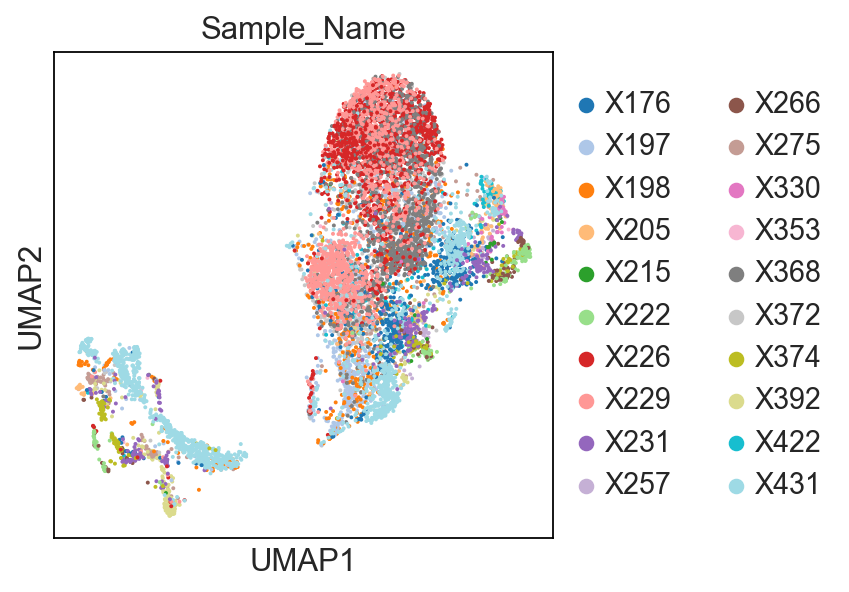

In [5]:
sc.pl.umap(adata, color='Sample_Name',
           palette=sns.color_palette('tab20',20))

### S9B

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_labels']`


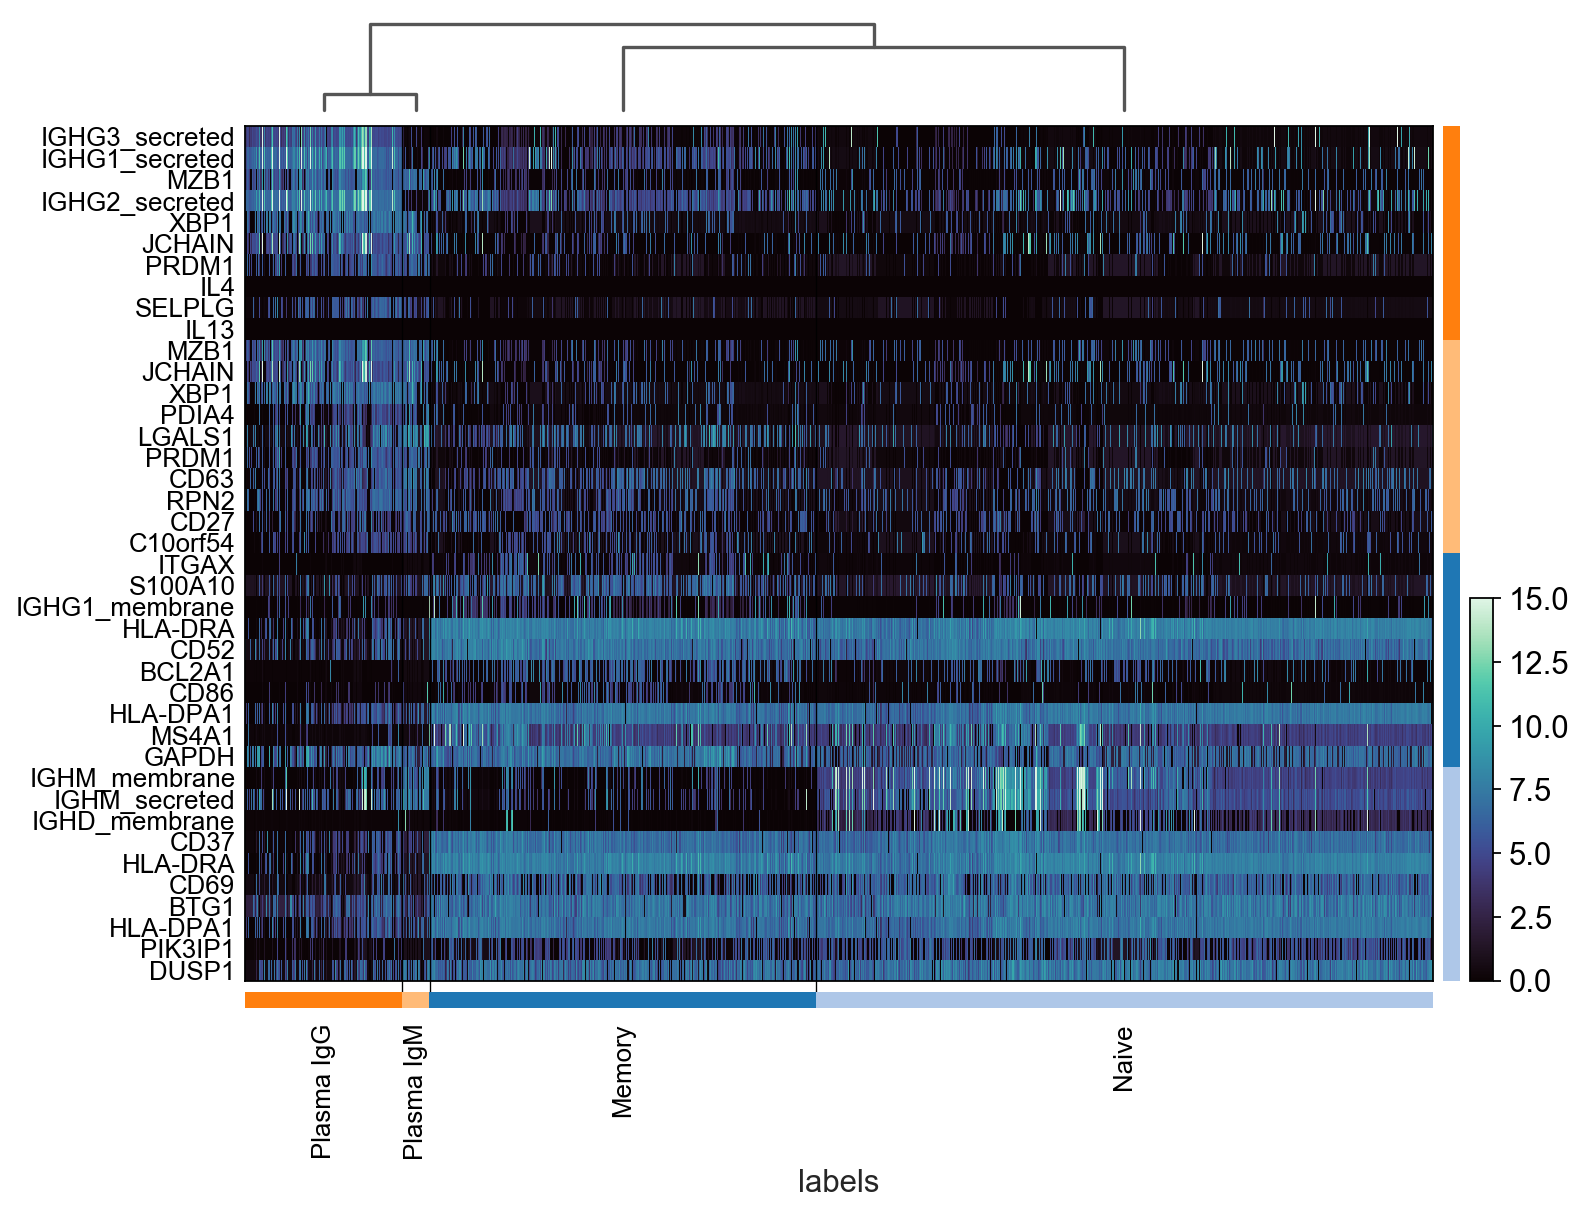

In [6]:
sc.tl.rank_genes_groups(adata, groupby='labels')
sc.pl.rank_genes_groups_heatmap(adata, groupby='labels', n_genes=10,cmap='mako',
                                swap_axes=True,show_gene_labels=True,vmin=0,vmax=15)

### S9D

In [7]:
adata.obs['clonotype'] = adata.obs['BCR_Heavy_CDR3_Nucleotide_Dominant']

In [8]:
import scirpy as ir

In [9]:
ir.tl.clonal_expansion(adata,clip_at=100000000)
adata.obs['clonotype_size'] = adata.obs['clonal_expansion']
ir.tl.clonal_expansion(adata,clip_at=5)
adata.obs['clonal_expansion'][adata.obs['clonotype'] == 'nan'] = '0'
adata.obs['clonotype_size'][adata.obs['clonotype'] == 'nan'] = '0'

In [10]:
pal = ['lightgrey'] + sns.color_palette("rocket_r", 5)

... storing 'clonal_expansion' as categorical
... storing 'clonotype_size' as categorical


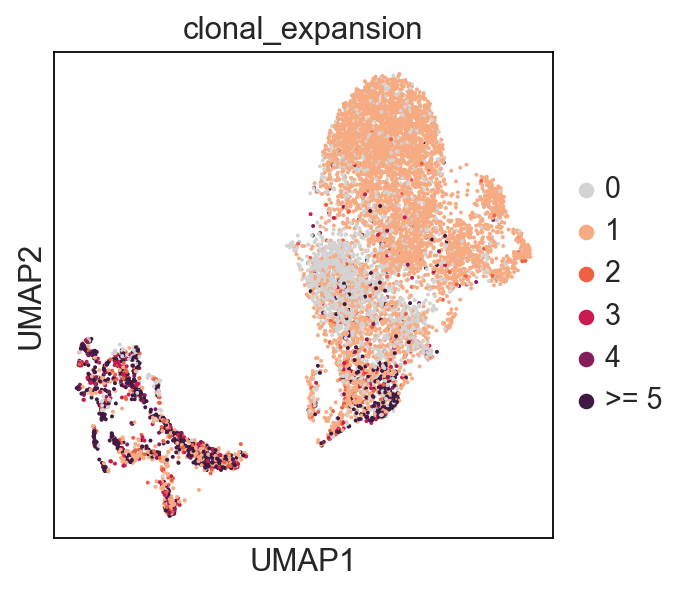

In [11]:
sc.pl.umap(adata, color='clonal_expansion',palette=pal)

### S9E

In [12]:
adata.obs['BCR_Heavy_CDR3_Nucleotide_Dominant'][adata.obs['Sample_Name'] == 'X198'].value_counts()

nan                                                                                  49
GCGAGGCGAGTGGGAACTAAGGGGAACTTTGACTAC                                                 13
GCGAGAGGAAGGGGCAGCAGCTGGGACTACTACTACTACGGTATGGACGTC                                  10
GCTAGAGTGGGGAGGGGGTTCTTTATGGCTTTTGATATC                                               8
GCGAGAGATTTGCAGTGGCTGGACGAAAACTTTGACTAC                                               5
                                                                                     ..
GCGAGAGCATGGGGCGGTGACTACGTCCCCGTTGCTTTTGATATC                                         0
GTCAGAATGTGTACTAGTGGTGTATGCTATCCCATTGATGACTAC                                         0
GCGAGAGCATTCCTTAGCAGCAGCTGGACTATCCCTCAGGACTAC                                         0
GCGAGAGCATTGAGTTCGATAGCCCCGGACCCATATTGTAGTGGTGGTAGCTGCTACTCCGGGCCTGATGCTTTTGATATC     0
GCGAGAGAGGACGAGAGTGGCTACGATCTATACTGTGAGACC                                            0
Name: BCR_Heavy_CDR3_Nucleotide_

In [13]:
c1 = 'GCGAGGCGAGTGGGAACTAAGGGGAACTTTGACTAC'
c2 = 'GCGAGAGGAAGGGGCAGCAGCTGGGACTACTACTACTACGGTATGGACGTC'
c3 = 'GCTAGAGTGGGGAGGGGGTTCTTTATGGCTTTTGATATC'

... storing 'X198_top' as categorical


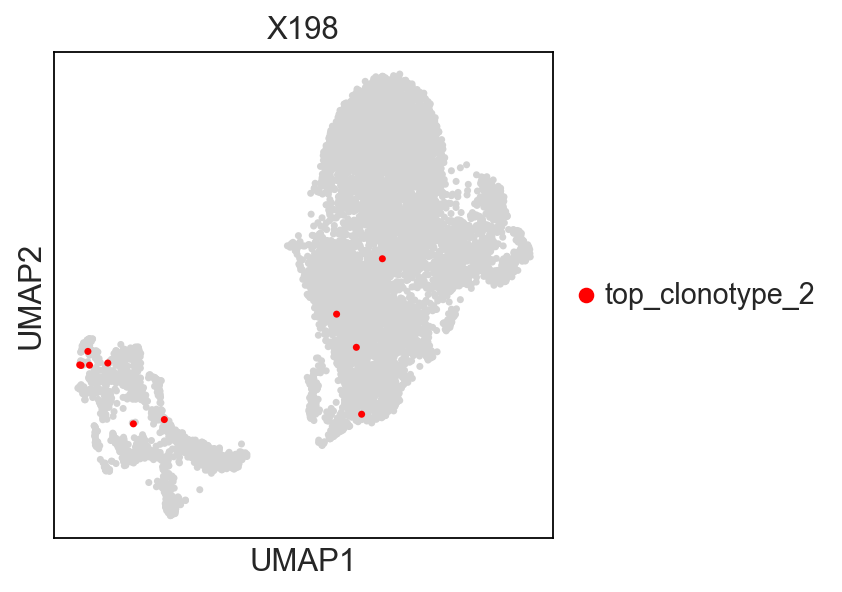

In [14]:
pal = ['lightgrey'] + ['red']
adata.obs['X198_top'] = 'nan'
adata.obs['X198_top'][adata.obs['BCR_Heavy_CDR3_Nucleotide_Dominant'] == c2] = 'top_clonotype_2'

sc.pl.umap(adata, color='X198_top',s=40,groups='top_clonotype_2',palette=pal,title='X198')

In [15]:
adata.obs['BCR_Heavy_CDR3_Nucleotide_Dominant'][adata.obs['Sample_Name'] == 'X431'].value_counts()

nan                                                                         197
GCGAGATCCGCTAATAGTGGTTATTATTACGGAGGTTACTACTACTCCGCTATGGACGTC                 45
GTAAAAGACATTGATAGTAGTGGTTATTTCTCCGGGGGGGGCTCC                                26
GCGAGAGGGGAATACAGCACCCGCTTCGACCCC                                            17
GCAAGAGATGGTGGGAGTGACTACTTTGACTAC                                            17
                                                                           ... 
GCGAGAGCCGAATATAGTGGGAGCTACACGGGGCGGTACTACTACTACGGTATGGACGTC                  0
GCGAGAGCCGAGGGGGCCCACTTCGTCTACTACTTTGACAAT                                    0
GCGAGAGCCGCTATCTACGGTGACTACGTAGGGGTCGACCCC                                    0
GCGAGAGCCGGAACATATTGTAGTGGTGGTAGCTGCTACTCCGGAGCGACGGAGTACTACGGTATGGACGTC      0
AACACAGGACCGGCCTCGCTAACACGC                                                   0
Name: BCR_Heavy_CDR3_Nucleotide_Dominant, Length: 6456, dtype: int64

In [16]:
c1 = 'GCGAGATCCGCTAATAGTGGTTATTATTACGGAGGTTACTACTACTCCGCTATGGACGTC'
c2 = 'GTAAAAGACATTGATAGTAGTGGTTATTTCTCCGGGGGGGGCTCC'
c3 = 'GCAAGAGATGGTGGGAGTGACTACTTTGACTAC'
c4 = 'GCGAGAGGGGAATACAGCACCCGCTTCGACCCC'

... storing 'X431_top' as categorical


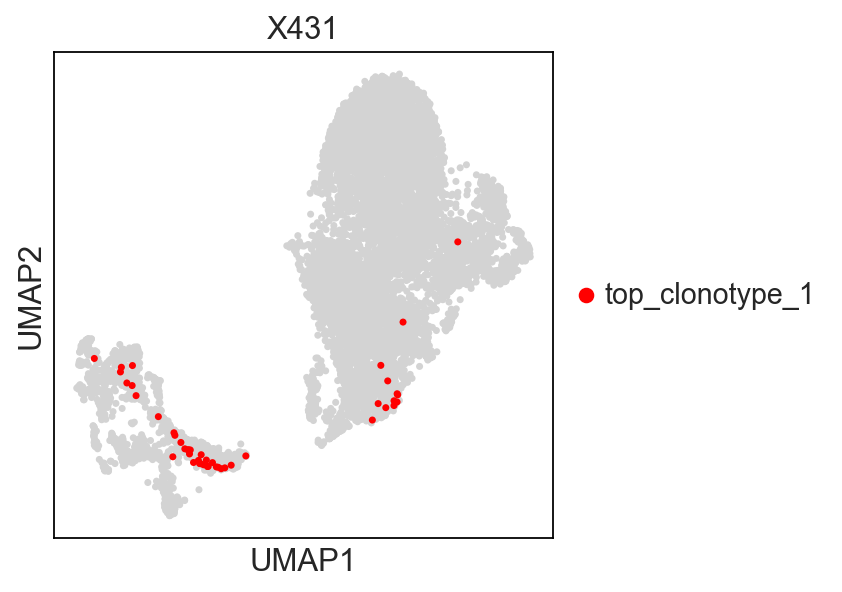

In [17]:
pal = ['lightgrey'] + ['red']
adata.obs['X431_top'] = 'nan'
adata.obs['X431_top'][adata.obs['BCR_Heavy_CDR3_Nucleotide_Dominant'] == c1] = 'top_clonotype_1'
sc.pl.umap(adata, color='X431_top',s=40,groups='top_clonotype_1',palette=pal,title='X431')